In [1]:
%matplotlib inline

from pathlib import Path

import pandas as pd
from sklearn import preprocessing
from sklearn.metrics import pairwise
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.cluster import KMeans
import matplotlib.pylab as plt
import seaborn as sns
from pandas.plotting import parallel_coordinates


## code for computing distance between records

In [3]:
utilities_df = pd.read_csv("Utilities.csv")
utilities_df.head()

,Company,Fixed_charge,RoR,Cost,Load_factor,Demand_growth,Sales,Nuclear,Fuel_Cost
0,Arizona,1.06,9.2,151,54.4,1.6,9077,0.0,0.628
1,Boston,0.89,10.3,202,57.9,2.2,5088,25.3,1.555
2,Central,1.43,15.4,113,53.0,3.4,9212,0.0,1.058
3,Commonwealth,1.02,11.2,168,56.0,0.3,6423,34.3,0.700
4,NY,1.49,8.8,192,51.2,1.0,3300,15.6,2.044


In [4]:
# set row names to the utilities column
utilities_df.set_index('Company', inplace = True)
utilities_df.head()

,Fixed_charge,RoR,Cost,Load_factor,Demand_growth,Sales,Nuclear,Fuel_Cost
Company,,,,,,,,
Arizona,1.06,9.2,151,54.4,1.6,9077,0.0,0.628
Boston,0.89,10.3,202,57.9,2.2,5088,25.3,1.555
Central,1.43,15.4,113,53.0,3.4,9212,0.0,1.058
Commonwealth,1.02,11.2,168,56.0,0.3,6423,34.3,0.700
NY,1.49,8.8,192,51.2,1.0,3300,15.6,2.044


In [5]:
## while not required, the conversion of integer data to float
## will avoid a warning when applying the scale function
utilities_df = utilities_df.apply(lambda x: x.astype('float64'))
            # df.apply(lambda x : ...) dataframe의 각 원소에 대해 적용됨  

In [6]:
utilities_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 22 entries, Arizona  to Virginia
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Fixed_charge   22 non-null     float64
 1   RoR            22 non-null     float64
 2   Cost           22 non-null     float64
 3   Load_factor    22 non-null     float64
 4   Demand_growth  22 non-null     float64
 5   Sales          22 non-null     float64
 6   Nuclear        22 non-null     float64
 7   Fuel_Cost      22 non-null     float64
dtypes: float64(8)
memory usage: 1.5+ KB


In [7]:
# compute Euclidean distance
d = pairwise.pairwise_distances(utilities_df, metric = 'euclidean')
d 
# 각 """🍓레코드🍓"""마다 거리를 계산하는 거임!!! 
# array 형태

array([[    0.        ,  3989.40807617,   140.40285538,  2654.27763182,
         5777.16767196,  2050.52943977,  1435.26501879,  4006.10418653,
          671.27634634,  2622.69900172,  8364.03105122,  2923.13610276,
         1899.27982096,   598.55663266,  2609.04536296,  6914.74206461,
         3363.06162585,  1063.00907357,  4430.25158541,  1790.48564783,
         2427.5888747 ,  1016.61769106],
       [ 3989.40807617,     0.        ,  4125.04413172,  1335.46650199,
         1788.06802698,  6039.6890759 ,  2554.28716246,  7994.15598526,
         3318.2765576 ,  1367.09063398, 12353.06269793,  1066.57943191,
         2091.16048509,  4586.30256362,  1380.74996249, 10903.14646362,
          629.76074832,  5052.33166918,  8419.61054132,  2199.72166505,
         1562.21081075,  5005.08126152],
       [  140.40285538,  4125.04413172,     0.        ,  2789.75967357,
         5912.5529085 ,  1915.15515444,  1571.29540091,  3872.25762571,
          807.92079223,  2758.55966318,  8229.22328148

In [8]:
pd.DataFrame(d, columns = utilities_df.index, index = utilities_df.index)

Company,Arizona,Boston,Central,Commonwealth,NY,Florida,Hawaiian,Idaho,Kentucky,Madison,...,Northern,Oklahoma,Pacific,Puget,San Diego,Southern,Texas,Wisconsin,United,Virginia
Company,,,,,,,,,,,,,,,,,,,,,
Arizona,0.000000,3989.408076,140.402855,2654.277632,5777.167672,2050.529440,1435.265019,4006.104187,671.276346,2622.699002,...,1899.279821,598.556633,2609.045363,6914.742065,3363.061626,1063.009074,4430.251585,1790.485648,2427.588875,1016.617691
Boston,3989.408076,0.000000,4125.044132,1335.466502,1788.068027,6039.689076,2554.287162,7994.155985,3318.276558,1367.090634,...,2091.160485,4586.302564,1380.749962,10903.146464,629.760748,5052.331669,8419.610541,2199.721665,1562.210811,5005.081262
Central,140.402855,4125.044132,0.000000,2789.759674,5912.552908,1915.155154,1571.295401,3872.257626,807.920792,2758.559663,...,2035.441520,461.341670,2744.502847,6780.430307,3498.113013,928.749249,4295.014690,1925.772564,2563.637362,883.535455
Commonwealth,2654.277632,1335.466502,2789.759674,0.000000,3123.153215,4704.363099,1219.560005,6659.534567,1983.314354,43.648894,...,756.831954,3250.984589,56.644626,9568.434429,710.292965,3717.202963,7084.372839,864.273153,232.476871,3670.018191
NY,5777.167672,1788.068027,5912.552908,3123.153215,0.000000,7827.429211,4342.093798,9782.158178,5106.094153,3155.095594,...,3879.167462,6373.743249,3168.177463,12691.155108,2414.698757,6840.150291,10207.392630,3987.335962,3350.073118,6793.035300
Florida,2050.529440,6039.689076,1915.155154,4704.363099,7827.429211,0.000000,3485.671562,1959.731080,2721.706296,4672.829286,...,3949.092316,1454.292604,4659.356262,4866.111649,5413.093004,988.044559,2380.124974,3840.227943,4478.028874,1035.981475
Hawaiian,1435.265019,2554.287162,1571.295401,1219.560005,4342.093798,3485.671562,0.000000,5440.461781,764.083188,1187.941143,...,466.559118,2032.614245,1174.075616,8349.366438,1928.441480,2498.149024,5865.447190,358.476293,992.453252,2451.185161
Idaho,4006.104187,7994.155985,3872.257626,6659.534567,9782.158178,1959.731080,5440.461781,0.000000,4676.638384,6627.291780,...,5903.395450,3412.263965,6614.499239,2909.014679,7368.815437,2943.535570,447.828673,5795.958815,6432.132202,2989.963982
Kentucky,671.276346,3318.276558,807.920792,1983.314354,5106.094153,2721.706296,764.083188,4676.638384,0.000000,1951.628580,...,1228.436327,1269.102099,1938.026557,7585.467294,2692.212361,1734.103297,5101.414140,1119.940014,1756.378966,1687.236030


## code for normalizing(정규화) data and computing distance

In [12]:
# scikit-learn uses population standard deviation (모표준편차 이용)
# ㄴ scikit-learn 의 preprcocessing 패키지의 scale 메서드 (정규화함)
utilities_df_norm = utilities_df.apply(preprocessing.scale, axis=0)

# pandas uese sample standard deviation (표본표준편차 이용)
utilities_df_norm = (utilities_df - utilities_df.mean())/utilities_df.std()

# compute normalized distance based on Sales and Fuel Cost
# compute Euclidean distance 
# (각 레코드마다 Sales, Fuel_Cost 변수 두 가지의 이차원 유클리드 거리를 구함)
d_norm = pairwise.pairwise_distances(utilities_df_norm[['Sales','Fuel_Cost']],
                                   metric = 'euclidean')

pd.DataFrame(d_norm, columns = utilities_df.index, index = utilities_df.index)

Company,Arizona,Boston,Central,Commonwealth,NY,Florida,Hawaiian,Idaho,Kentucky,Madison,...,Northern,Oklahoma,Pacific,Puget,San Diego,Southern,Texas,Wisconsin,United,Virginia
Company,,,,,,,,,,,,,,,,,,,,,
Arizona,0.000000,2.010329,0.774179,0.758738,3.021907,1.244422,1.885248,1.265638,0.461292,0.738650,...,0.564657,0.182648,1.570780,1.947668,2.509043,0.913621,1.247976,5.214913e-01,2.761745,1.252350
Boston,2.010329,0.000000,1.465703,1.582821,1.013370,1.792397,0.740283,3.176654,1.557738,1.719632,...,1.940166,2.166078,0.478334,3.501390,0.679634,1.634425,2.890560,1.654255e+00,1.100595,1.479261
Central,0.774179,1.465703,0.000000,1.015710,2.432528,0.631892,1.156092,1.732777,0.419254,1.102287,...,1.113433,0.855093,0.987772,2.065643,1.836762,0.276440,1.428159,8.389668e-01,2.034824,0.510365
Commonwealth,0.758738,1.582821,1.015710,0.000000,2.571969,1.643857,1.746027,2.003230,0.629994,0.138758,...,0.377004,0.937389,1.258835,2.699060,2.202930,1.278514,1.998818,2.434079e-01,2.547116,1.502093
NY,3.021907,1.013370,2.432528,2.571969,0.000000,2.635573,1.411695,4.162561,2.566439,2.705445,...,2.938637,3.174588,1.462019,4.397433,0.715629,2.558409,3.831132,2.661786e+00,0.952507,2.328691
Florida,1.244422,1.792397,0.631892,1.643857,2.635573,0.000000,1.228805,1.764123,1.025663,1.722510,...,1.698624,1.243634,1.343185,1.767581,1.953423,0.366744,1.277920,1.452417e+00,2.016493,0.313847
Hawaiian,1.885248,0.740283,1.156092,1.746027,1.411695,1.228805,0.000000,2.860189,1.436822,1.880361,...,2.027224,1.997036,0.560997,2.995848,0.726095,1.205034,2.463227,1.711256e+00,0.879934,0.929414
Idaho,1.265638,3.176654,1.732777,2.003230,4.162561,1.764123,2.860189,0.000000,1.650417,1.950296,...,1.708409,1.083449,2.705579,0.992092,3.563727,1.658671,0.600089,1.778813e+00,3.720421,1.980715
Kentucky,0.461292,1.557738,0.419254,0.629994,2.566439,1.025663,1.436822,1.650417,0.000000,0.697674,...,0.694524,0.608401,1.110854,2.180496,2.048098,0.658996,1.493274,4.267801e-01,2.308613,0.929141


## code for running hierarchical clustering(계층적 군집화) and generating a dendrogram

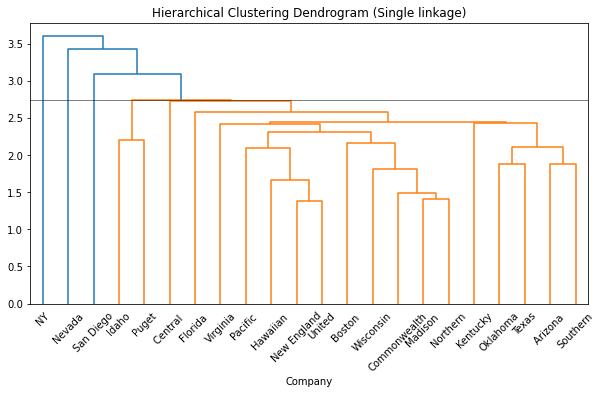

In [18]:
# in linkage() set argument(인자) method = 'single', 'complete', 'average',
# 'weighted', 'centroid', 'median', 'ward'

## single method

Z = linkage(utilities_df_norm, method = 'single') 
# linkage() : 주어진 method 인자에 따라 군집화 모델 생성
fig = plt.figure(figsize = (10,6))
fig.subplots_adjust(bottom=0.23)
plt.title('Hierarchical Clustering Dendrogram (Single linkage)')
plt.xlabel('Company')
dendrogram(Z, labels = utilities_df_norm.index, color_threshold=2.75)
# color_threshold : 컷오프 값 밑으로 군집화 된 놈들을 색깔로 구별해 줌
plt.axhline(y=2.75, color='black', linewidth=0.5) # cutoff 수평선 그리기
plt.show()

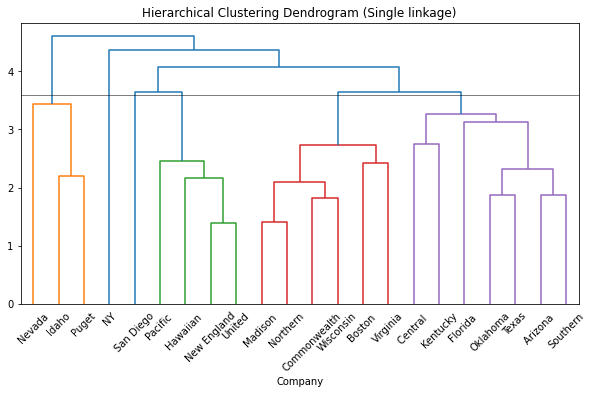

In [20]:
## average method

Z = linkage(utilities_df_norm, method = 'average')
fig = plt.figure(figsize = (10,6))
fig.subplots_adjust(bottom=0.23)
plt.title('Hierarchical Clustering Dendrogram (Single linkage)')
plt.xlabel('Company')
dendrogram(Z, labels = utilities_df_norm.index, color_threshold=3.6)
# cutoff 수평선 그리기
plt.axhline(y=3.6, color='black', linewidth=0.5) #, linestlye='dashed'
plt.show()

## Single Linkage (output modified for clarity)

In [29]:
memb = fcluster(linkage(utilities_df_norm, method='single'),
               6, criterion='maxclust')
memb
# fcluster() : linkage로 만들어진 군집화 모델에 따라 각 매개변수에 맞게 군집 만듦.

array([2, 2, 3, 2, 6, 2, 2, 1, 2, 2, 5, 2, 2, 2, 2, 1, 4, 2, 2, 2, 2, 2],
      dtype=int32)

In [22]:
memb = pd.Series(memb, index = utilities_df_norm.index)
memb

Company
Arizona         2
Boston          2
Central         3
Commonwealth    2
NY              6
Florida         2
Hawaiian        2
Idaho           1
Kentucky        2
Madison         2
Nevada          5
New England     2
Northern        2
Oklahoma        2
Pacific         2
Puget           1
San Diego       4
Southern        2
Texas           2
Wisconsin       2
United          2
Virginia        2
dtype: int32

In [25]:
for key, item in memb.groupby(memb):
    print(key, ': ', ', '.join(item.index))

1 :  Idaho, Puget
2 :  Arizona , Boston , Commonwealth, Florida , Hawaiian , Kentucky, Madison , New England, Northern, Oklahoma, Pacific , Southern, Texas, Wisconsin, United, Virginia
3 :  Central 
4 :  San Diego
5 :  Nevada
6 :  NY


## Average Linkage (output modified for clarity)

In [28]:
memb = fcluster(linkage(utilities_df_norm, method = 'average'), 6,
               criterion = 'maxclust')
memb = pd.Series(memb, index = utilities_df_norm.index)
for key, item in memb.groupby(memb) :
    print(key, ': ',', '.join(item.index))

1 :  Idaho, Nevada, Puget
2 :  Hawaiian , New England, Pacific , United
3 :  San Diego
4 :  Boston , Commonwealth, Madison , Northern, Wisconsin, Virginia
5 :  Arizona , Central , Florida , Kentucky, Oklahoma, Southern, Texas
6 :  NY


## code for creating heatmap

In [30]:
# set labels as cluster membership and utility name
utilities_df_norm.index = ['{}: {}'.format(cluster, state) 
                           for cluster, state in zip(memb, utilities_df_norm.index)]
utilities_df_norm

,Fixed_charge,RoR,Cost,Load_factor,Demand_growth,Sales,Nuclear,Fuel_Cost
2: Arizona,-0.293158,-0.684639,-0.417122,-0.577715,-0.526228,0.045903,-0.714629,-0.853675
2: Boston,-1.214511,-0.194454,0.821002,0.206836,-0.333812,-1.077764,0.792048,0.813297
3: Central,1.712141,2.078224,-1.339646,-0.891536,0.051019,0.083931,-0.714629,-0.080431
2: Commonwealth,-0.509947,0.206607,-0.004414,-0.219063,-0.943128,-0.701706,1.328020,-0.724202
6: NY,2.037324,-0.862888,0.578233,-1.295019,-0.718643,-1.581428,0.214389,1.692638
2: Florida,1.115971,1.231540,-1.388200,0.677567,-1.744860,0.623370,0.625301,0.248648
2: Hawaiian,0.573998,0.652230,0.165525,2.381165,-0.333812,-0.358324,-0.714629,0.987726
1: Idaho,-0.076369,-0.684639,1.864911,0.005094,0.018950,1.174077,-0.714629,-1.427315
2: Kentucky,1.224365,1.008728,-0.004414,0.767230,1.269651,-0.143112,-0.714629,-0.432886
2: Madison,0.032026,0.741355,0.699617,-0.891536,-0.173466,-0.692692,1.619827,-0.862667


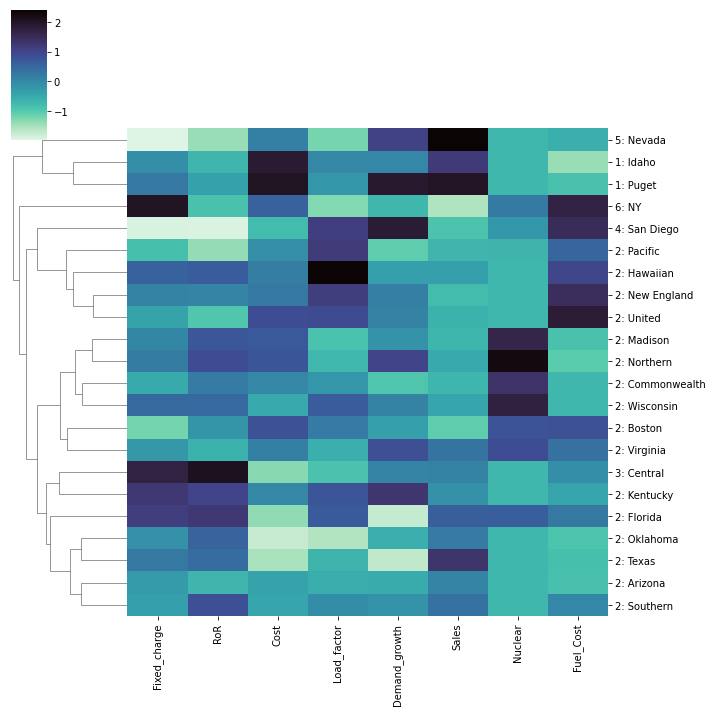

In [32]:
# plot heatmap
# the '_r' suffix reverses the color mapping to large = dark
sns.clustermap(utilities_df_norm, method = 'average', col_cluster=False, cmap='mako_r')